### Question 1 Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import t
from scipy.stats import norm

### Step 1 Decide Null and Alternate Hypothesis : 
$$ Null \ Hypothesis(Status \ Quo) : H_0 \ : \ \mu=500 \ gm $$
$$ Alternate \ Hypothesis(Bold \ Claim) : H_1 \ : \ \mu \neq \ 500gm $$




### Step 2 Collect samples to compute test statistics :

$$ Samples(x) = [500, 612,310, 390, 555] $$
$$ n = 5 $$

In [29]:
l = [500, 612,310, 390, 555]

### Step 3 (Compute test statistics on the sample collected):
$$ \mu_\bar{x} = \frac{\sum_{i=0}^{n-1} x_i}{n} = 473.4 \ gm $$
$$ x \implies Samples $$

$$ S^2 = \frac{\sum_{i=0}^{n-1} (x_i - \mu_x)^2}{n} = 12046.240000000002 $$

Z Score here can't be calculated due to absense of population standard deviation, so we will calculate t score.
$$ t \ score = \frac{\mu_x - \mu_\bar{x}}{S/\sqrt{n}} = 0.541 $$

In [30]:
sample_mean = sum(l) / len(l)
print(sample_mean)

473.4


In [31]:
s = 0
for i in l:
    s+=pow((i - sample_mean), 2)
sample_variance = s / len(l)
print('sample variance = '+ str(sample_variance))
sample_std = sample_variance ** 0.5
print('sample_std = ' +str(sample_std))
population_mean = 500
sample_size = len(l)
def t_score(population_mean, sample_mean, sample_size, sample_std):
    
      numerator = population_mean - sample_mean
      denominator = sample_std / (sample_size ** 0.5)
      return numerator / denominator

t_calculated = t_score(population_mean, sample_mean, sample_size, sample_std)
print('t_score = '+str(t_calculated)) 

sample variance = 12046.240000000002
sample_std = 109.7553643335942
t_score = 0.5419271172998043


### Step 4(Decide significance level) $\implies$
$$ Confidence = 95\% $$
$$ 1 - \alpha = 0.95 $$
$$ \alpha = 0.05 $$

In [32]:
alpha = 1 - 0.95
print(round(alpha, 2))

0.05


In [33]:
#Two tail test
t_critical = t.ppf(1-alpha/2, df=4)
print(t_critical)

2.7764451051977987


### Step 5.1 (Apply decision Rule using t score)  
 1. In case of 2 tailed : $$ |t| > t_{{n - 1}, {\frac{\alpha}{2}} }   -----> Reject \ H_0, \ Accept \ H_1 $$
 2. In case of right tailed: $$ t > t_{{n-1}, {\alpha}}   -----> Reject \ H_0, \ Accept \ H_1 $$ 
 3. In case of left tailed  : $$ t < t_{{n-1}, \alpha}   -----> Reject \ H_0, \ Accept \ H_1 $$

Here we will use two tailed test : $$ |t| < t_{4, 0.025} \\ 0.541 < 2.776 \\ We \ Reject \ H_1 $$


In [34]:
if abs(t_calculated) < t_critical:
  print("Accept Null Hypothesis")
else:
  print("Reject Null Hypothesis") 

Accept Null Hypothesis



### Step 5.2 Apply decision Rule using p score:
1. For 2 tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(test \ statistic)) $$
2. For one tailed test $\implies$ $$ p \ value = (1 - cdf(test \ statistic)) $$

$$ if (p \ values < \alpha) : Reject \ H_0, \ Accept \ H_1 $$


Here we use two tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(0.541)) \\ p \ value = 0.587 \\ p \ value > \alpha \\ We \ Reject \ H_1 $$

In [35]:
#Two tail test
p_val = 2 * (1-norm.cdf(abs(t_calculated)))
print(p_val)

0.5878687150542659


In [43]:
if (p_val > alpha):
  print("Accept Null Hypothesis")
else:
  print("Reject Null Hypothesis")

Accept Null Hypothesis


Text(473.4, 0.0007, 'X_bar')

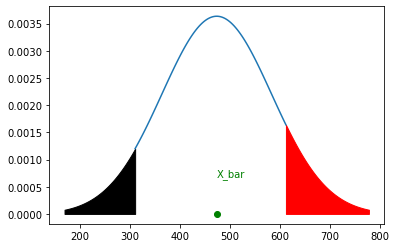

In [45]:
x_min = min(l)
x_max = max(l)
mean = sample_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

t_critical_left = mean + (-1 * t_critical * std)
t_critical_right = mean + (t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color="black")

x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color="red")

plt.scatter(mean, 0,color='green')
plt.annotate("X_bar", (mean, 0.0007),color = 'green')